In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import src.config as config
import src.data_analysis.utils as da_utils
from src.db.broker import DbBroker
from src.utils import initialize_features_info

%load_ext autoreload
%autoreload 2

In [2]:
db_broker = DbBroker()
df = pd.read_sql(
    db_broker.get_all_listings_statement(),
    db_broker.engine,
    dtype_backend=config.DTYPE_BACKEND,
    index_col=config.INDEX,
)
db_broker.engine.dispose()

features_info = initialize_features_info()

In [3]:
print(f"Duplicate rows: {df.duplicated().sum()}")
print(20 * "-")
df.info()

Duplicate rows: 0
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 30788 entries, 9249043 to 23246511
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      30788 non-null  string
 1   short_url                 30788 non-null  string
 2   price                     30788 non-null  string
 3   listing_followers_no      30788 non-null  string
 4   location                  30788 non-null  string
 5   images_no                 30788 non-null  string
 6   safety                    30788 non-null  string
 7   equipment                 30788 non-null  string
 8   other                     30788 non-null  string
 9   description               30788 non-null  string
 10  id_1                      30788 non-null  Int64 
 11  condition                 30788 non-null  string
 12  brand                     30788 non-null  string
 13  model                     30788 n

In [4]:
# Prefix columns from table general_informations with "gi_" 
# and additional_informations with "ai"
id_1_col_idx = df.columns.get_loc("id_1")
id_2_col_idx = df.columns.get_loc("id_2")

columns_from_gi = df.columns[id_1_col_idx + 1 : id_2_col_idx].values
columns_from_ai = df.columns[id_2_col_idx + 1 :].values

df.rename(columns=dict(zip(columns_from_gi,  "gi_"+ columns_from_gi)), inplace=True)
df.rename(columns=dict(zip(columns_from_ai,  "ai_"+ columns_from_ai)), inplace=True)

del id_1_col_idx, id_2_col_idx, columns_from_gi, columns_from_ai

# Removing redundant ids
del df["id_1"], df["id_2"]

# Removing gi_fixed_price that is poorly scraped
del df["gi_fixed_price"]

In [5]:
df_train, df_test = train_test_split(df, test_size=config.TEST_SIZE, random_state=config.RANDOM_SEED)

idx_to_remove = []

In [6]:
n_rows_train, n_cols_train = df_train.shape

print("Train dataset shape")
print(20 * "-")
print(f"No of rows: {n_rows_train}")
print(f"No of cols: {n_cols_train}")

print()

n_rows_test, n_cols_test = df_test.shape

print("Test dataset shape")
print(20 * "-")
print(f"No of rows: {n_rows_test}")
print(f"No of cols: {n_cols_test}")
print(20 * "-")

Train dataset shape
--------------------
No of rows: 24630
No of cols: 47

Test dataset shape
--------------------
No of rows: 6158
No of cols: 47
--------------------


In [7]:
da_utils.get_nas(df_train)

,Missing Count,Missing [%]
ai_range_on_full_battery_km,24514,99.529030
gi_battery_capacity,24490,99.431587
ai_interest_free_credit,24478,99.382866
ai_cash_payment,24360,98.903776
ai_deposit,24170,98.132359
ai_installment_amount,24064,97.701989
ai_installment_no,24047,97.632968
ai_leasing,23851,96.837190
gi_certified,23249,94.393017
ai_credit,22972,93.268372


<h1> Univariate analysis

In [8]:
current_col = "price"
da_utils.display_feature_name_heading(current_col)

display(df_train[current_col].head())

<h3>'price' feature</h3>

id
22699698    33.890 €
23221633    12.998 €
22569748    13.999 €
22641862     8.399 €
23220545     3.300 €
Name: price, dtype: string

In [9]:
df_train[current_col] = pd.to_numeric(df_train.price.str.slice(stop=-1).str.replace(".", ""), errors="raise")
df_test[current_col] = pd.to_numeric(df_test.price.str.slice(stop=-1).str.replace(".", ""), errors="raise")

In [10]:
df_train[df_train[current_col] == 1]

,name,short_url,price,listing_followers_no,location,images_no,safety,equipment,other,description,...,ai_import_country,ai_sales_method,ai_credit,ai_deposit,ai_installment_no,ai_installment_amount,ai_interest_free_credit,ai_leasing,ai_cash_payment,ai_range_on_full_battery_km
id,,,,,,,,,,,,,,,,,,,,,
23220124,Audi A4 RATA 183e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,1,2,Beograd,39,"Airbag za vozača,Airbag za suvozača,Bočni airb...","Servo volan,Daljinsko zaključavanje,Tonirana s...",,,...,<NA>,<NA>,DA,<NA>,<NA>,183 €,<NA>,<NA>,<NA>,<NA>
23221119,Opel Astra J RATA 148e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,1,1,Beograd,14,"Airbag za vozača,Airbag za suvozača,Bočni airb...","Servo volan,Multifunkcionalni volan,Tempomat,D...",,Vozilo u dolasku ...............................,...,<NA>,<NA>,DA,<NA>,<NA>,148 €,<NA>,<NA>,<NA>,<NA>
23220566,Renault Scenic RATA 148e BEZ UCESCA,https://www.polovniautomobili.com/auto-oglasi/...,1,,Beograd,28,"Airbag za vozača,Airbag za suvozača,Bočni airb...","Servo volan,Multifunkcionalni volan,Tempomat,D...",,VOZILO U DOLASKU ...............................,...,<NA>,<NA>,DA,<NA>,<NA>,148 €,<NA>,<NA>,<NA>,<NA>
23230448,Peugeot 306,https://www.polovniautomobili.com/auto-oglasi/...,1,2,Landol,19,"Airbag za vozača,Airbag za suvozača,ABS","Metalik boja,Servo volan,Tonirana stakla,Radio...",Garažiran,,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


These are cars that had value "Po dogovoru", so that means they didn't have a price to begin with and they will be dropped.

In [11]:
df_train = df_train[df_train[current_col] != 1]
df_test = df_test[df_test[current_col] != 1]

In [12]:
df_train[df_train.price == "Po dogovoru"]

,name,short_url,price,listing_followers_no,location,images_no,safety,equipment,other,description,...,ai_import_country,ai_sales_method,ai_credit,ai_deposit,ai_installment_no,ai_installment_amount,ai_interest_free_credit,ai_leasing,ai_cash_payment,ai_range_on_full_battery_km
id,,,,,,,,,,,,,,,,,,,,,


In [13]:
cars_price_less_than_100_train = df_train.loc[df_train[current_col] < 100, current_col]
cars_price_less_than_100_test = df_test.loc[df_test[current_col] < 100, current_col]
cars_price_less_than_100_train

id
22681873    83
22675403    78
22681890    95
23225453    50
Name: price, dtype: Int64

In [14]:
df_train.loc[cars_price_less_than_100_train.index, "short_url"].tolist()

['https://www.polovniautomobili.com/auto-oglasi/22681873/Ford Focus RATA 83e BEZ UČEŠĆA',
 'https://www.polovniautomobili.com/auto-oglasi/22675403/Opel Meriva RATA 78e BEZ UCESCA',
 'https://www.polovniautomobili.com/auto-oglasi/22681890/Opel Astra H RATA 99e BEZ UČEŠĆA',
 'https://www.polovniautomobili.com/auto-oglasi/23225453/Zastava Yugo Tempo']

All of these cars are going to be deleted because they actually don't have value of price (their current value is the result of poor handling the case when price is set by an agreement).

In [15]:
df_train.drop(cars_price_less_than_100_train.index, axis=0, inplace=True)
df_test.drop(cars_price_less_than_100_test.index, axis=0, inplace=True)

Univariate analysis of 'price' column
Histogram and box plot


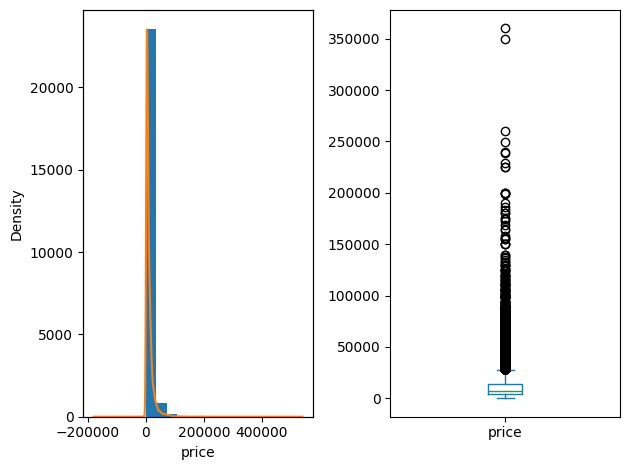

Descriptive statistics


count         24622.0
mean     11310.052392
std      14666.085482
min             104.0
25%            3800.0
50%            6900.0
75%           13500.0
max          360000.0
Name: price, dtype: Float64

Variance: 1.2967301099439885
Skewness: 5.739281624472869
Kurtosis: 64.91036913440722

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [16]:
da_utils.show_hist_box_numerical_col(df_train, current_col)

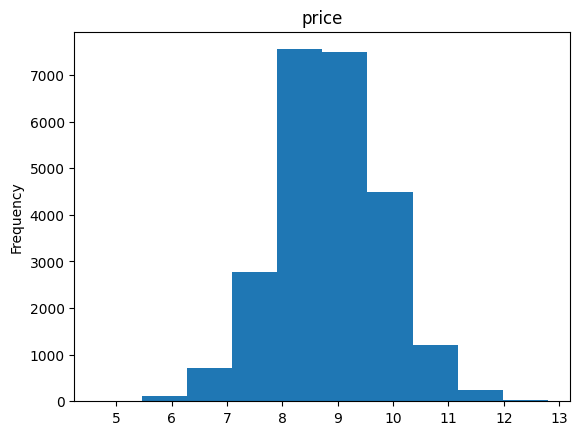

In [17]:
df_train[current_col].apply(np.log1p).plot(kind="hist", title=current_col);

In [18]:
current_col = "listing_followers_no"
da_utils.display_feature_name_heading(current_col)

display(df_train[current_col].head())

<h3>'listing_followers_no' feature</h3>

id
22699698     3
23221633     3
22569748    18
22641862    32
23220545     2
Name: listing_followers_no, dtype: string

In [19]:
if (df_train[current_col] == "").sum() == pd.to_numeric(df_train[current_col]).isna().sum():
    df_train[current_col] = pd.to_numeric(df_train[current_col])
else:
    raise ValueError("There is a listing_followers_no value that is probably incorrectly parsed.")

if (df_test[current_col] == "").sum() == pd.to_numeric(df_test[current_col]).isna().sum():
    df_test[current_col] = pd.to_numeric(df_test[current_col])
else:
    raise ValueError("There is a listing_followers_no value that is probably incorrectly parsed.")

Univariate analysis of 'listing_followers_no' column
Histogram and box plot


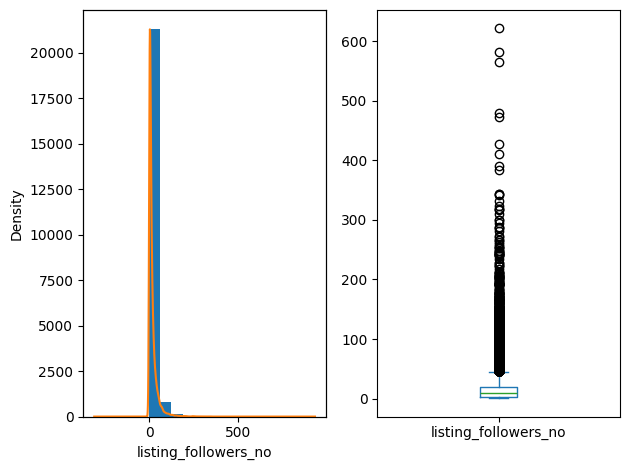

Descriptive statistics


count      22365.0
mean     17.489425
std       27.41364
min            1.0
25%            3.0
50%            9.0
75%           20.0
max          621.0
Name: listing_followers_no, dtype: Float64

Variance: 1.5674408328171134
Skewness: 5.726671953980806
Kurtosis: 61.87304657834173

NA values
Count [n]: 2257
Percentage [%]: 9.166598976525059%


In [20]:
da_utils.show_hist_box_numerical_col(df_train, current_col)

Missing values actually represents zero, so the imputation will be done accordingly.

In [21]:
df_train[current_col].fillna(value=0, inplace=True)
df_test[current_col].fillna(value=0, inplace=True)

/tmp/ipykernel_20359/47715463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[current_col].fillna(value=0, inplace=True)


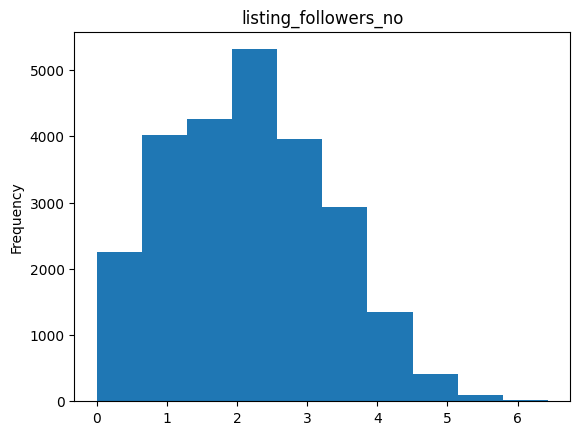

In [22]:
df_train[current_col].apply(np.log1p).plot(kind="hist", title=current_col);

In [23]:
features_info["numerical"].append(current_col)

In [24]:
current_col = "location"
da_utils.display_feature_name_heading(current_col)

display(df_train[current_col].head())

<h3>'location' feature</h3>

id
22699698              Beograd
23221633             Novi Sad
22569748    Sremska Mitrovica
22641862                Futog
23220545         Novi Beograd
Name: location, dtype: string

In [25]:
da_utils.get_value_counts_freq_with_perc(df_train, column=current_col)

,count,percentage [%]
location,,
Beograd,4066,16.513687
Novi Sad,1808,7.343027
Niš,1045,4.244172
Kragujevac,905,3.675575
Čačak,783,3.180083
...,...,...
Drakčići,1,0.004061
Ledinci,1,0.004061
Deveti Maj,1,0.004061


In [26]:
features_info["nominal"].append(current_col)

In [27]:
current_col = "images_no"
da_utils.display_feature_name_heading(current_col)

display(df_train[current_col].head())

<h3>'images_no' feature</h3>

id
22699698    15
23221633    15
22569748    20
22641862    30
23220545     6
Name: images_no, dtype: string

In [28]:
pd.to_numeric(df_train[current_col]).isna().sum()

0

In [29]:
df_train[current_col] = pd.to_numeric(df_train[current_col])
df_test[current_col] = pd.to_numeric(df_test[current_col])

Univariate analysis of 'images_no' column
Histogram and box plot


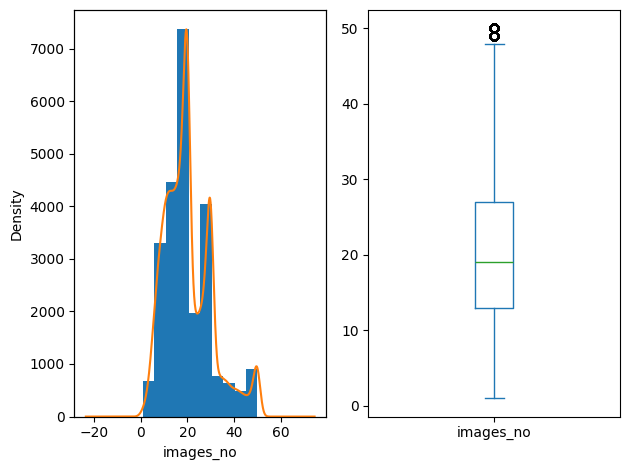

Descriptive statistics


count      24622.0
mean     20.391398
std      10.248639
min            1.0
25%           13.0
50%           19.0
75%           27.0
max           50.0
Name: images_no, dtype: Float64

Variance: 0.5025962116400101
Skewness: 0.8834781503340093
Kurtosis: 0.6518418348517869

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [30]:
da_utils.show_hist_box_numerical_col(df_train, current_col)

In [31]:
features_info["numerical"].append(current_col)

In [32]:
current_col = "safety"
da_utils.display_feature_name_heading(current_col)

display(df_train[current_col].head())

<h3>'safety' feature</h3>

id
22699698    Airbag za vozača,Airbag za suvozača,Bočni airb...
23221633    Airbag za vozača,Airbag za suvozača,Bočni airb...
22569748    Airbag za vozača,Airbag za suvozača,Bočni airb...
22641862    Airbag za vozača,Airbag za suvozača,Bočni airb...
23220545    Airbag za vozača,Airbag za suvozača,Bočni airb...
Name: safety, dtype: string

In [33]:
df_train_safety_dummies = df_train[current_col].str.get_dummies(sep=",").add_prefix("s_")
df_test_safety_dummies = df_test[current_col].str.get_dummies(sep=",").add_prefix("s_")

safety_columns = df_train_safety_dummies.columns.tolist()

df_train = pd.concat([df_train, df_train_safety_dummies], axis=1)
df_test = pd.concat([df_test, df_test_safety_dummies], axis=1)

del df_train_safety_dummies
del df_test_safety_dummies

del df_train[current_col]
del df_test[current_col]

In [34]:
for col in safety_columns:
    display(da_utils.get_value_counts_freq_with_perc(df_train, col))

,count,percentage [%]
s_ABS,,
1,22832,92.730079
0,1790,7.269921


,count,percentage [%]
s_ASR,,
1,17833,72.427098
0,6789,27.572902


,count,percentage [%]
s_Airbag za suvozača,,
1,22974,93.306799
0,1648,6.693201


,count,percentage [%]
s_Airbag za vozača,,
1,23130,93.940379
0,1492,6.059621


,count,percentage [%]
s_Alarm,,
0,17866,72.561124
1,6756,27.438876


,count,percentage [%]
s_Asistencija praćenja trake,,
0,20817,84.546341
1,3805,15.453659


,count,percentage [%]
s_Automatsko kočenje,,
0,20709,84.107709
1,3913,15.892291


,count,percentage [%]
s_Blokada motora,,
0,17793,72.264641
1,6829,27.735359


,count,percentage [%]
s_Bočni airbag,,
1,21351,86.715133
0,3271,13.284867


,count,percentage [%]
s_Centralno zaključavanje,,
1,22606,91.8122
0,2016,8.1878


,count,percentage [%]
s_Child lock,,
1,13857,56.278938
0,10765,43.721062


,count,percentage [%]
s_ESP,,
1,18911,76.805296
0,5711,23.194704


,count,percentage [%]
s_Kodiran ključ,,
1,15707,63.792543
0,8915,36.207457


,count,percentage [%]
s_Mehanička zaštita,,
0,23154,94.037852
1,1468,5.962148


,count,percentage [%]
s_OBD zaštita,,
0,19988,81.179433
1,4634,18.820567


,count,percentage [%]
s_Senzor mrtvog ugla,,
0,22407,91.00398
1,2215,8.99602


,count,percentage [%]
s_Ulazak bez ključa,,
0,20496,83.242629
1,4126,16.757371


,count,percentage [%]
s_Vazdušni jastuci za kolena,,
0,19442,78.961904
1,5180,21.038096


In [35]:
features_info["binary"].append(safety_columns)